<a href="https://colab.research.google.com/github/Jeba-Maliha/Cyber-Security-Projects/blob/main/Cyber_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: file aupload

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#Now you can access the uploaded file using its filename.  For example
#if the uploaded file is called "myfile.txt":
#with open("myfile.txt", 'r') as f:
#  data = f.read()
#  print(data)


Saving Data_of_Attack_Back.csv to Data_of_Attack_Back (2).csv
User uploaded file "Data_of_Attack_Back (2).csv" with length 130666 bytes


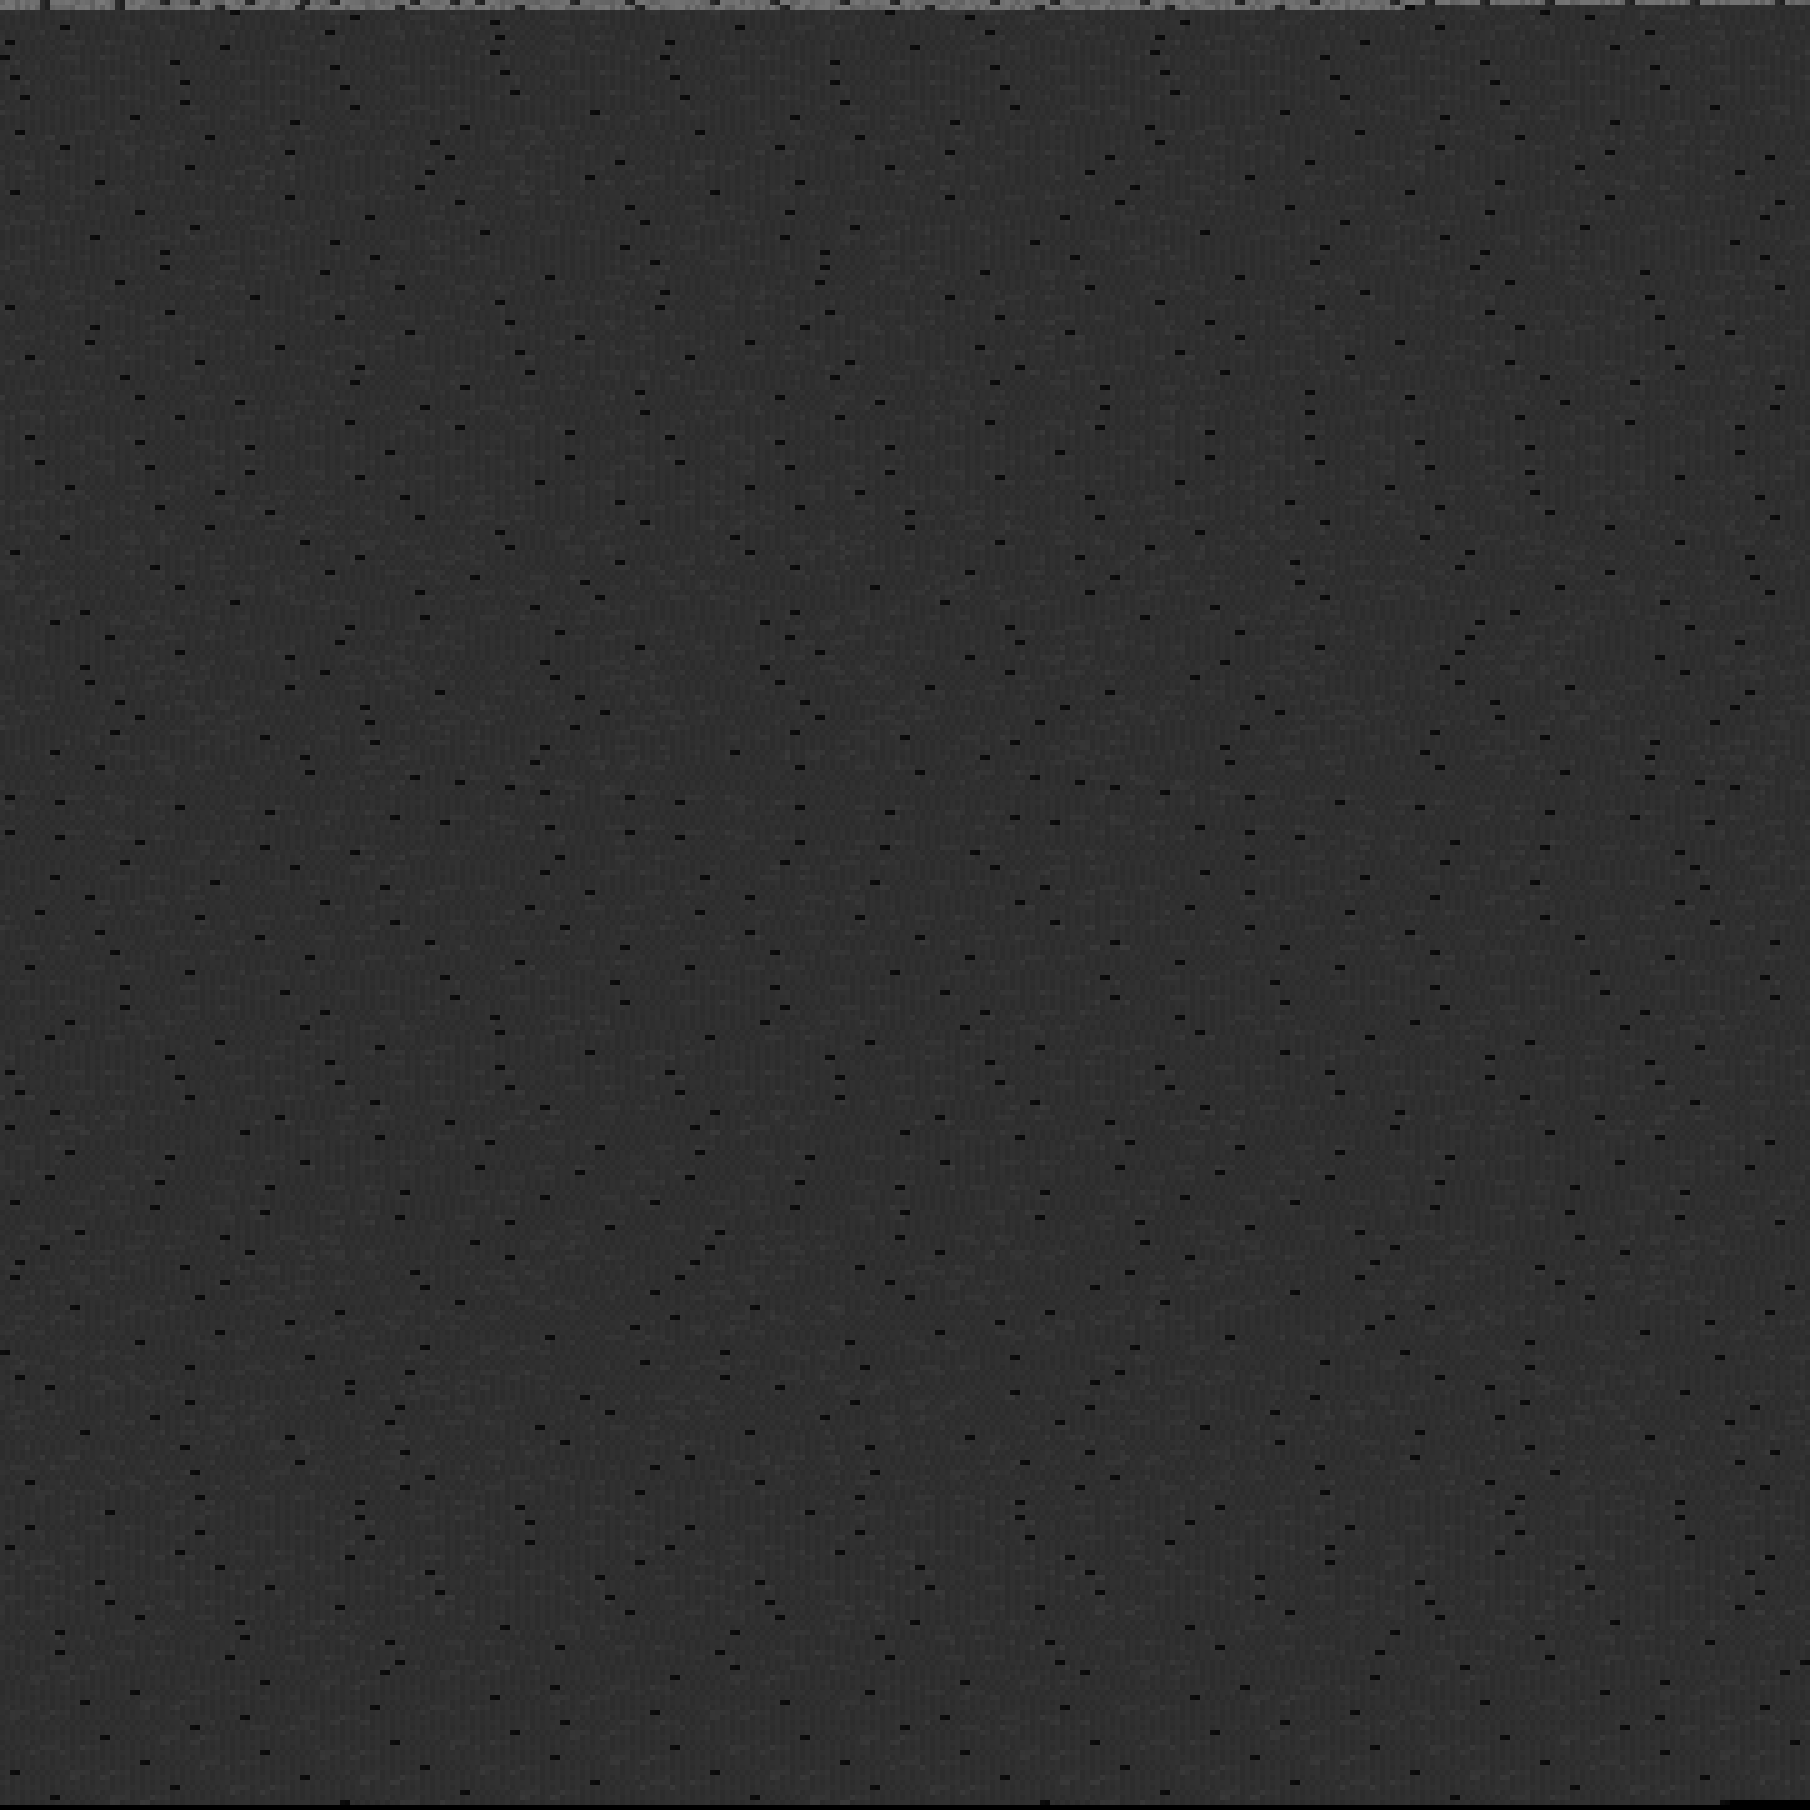

In [4]:
# prompt: make printed image larger

import numpy as np
from math import sqrt, ceil
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

#uploaded = files.upload()
#for fn in uploaded.keys():
 # print('User uploaded file "{name}" with length {length} bytes'.format(
  #    name=fn, length=len(uploaded[fn])))



#Input file name (random file I found in my folder).
input_file_name = 'Data_of_Attack_Back.csv';

#Read the whole file to data
with open(input_file_name, 'rb') as binary_file:
    data = binary_file.read()

# Data length in bytes
data_len = len(data)

# d is a verctor of data_len bytes
d = np.frombuffer(data, dtype=np.uint8)

# Assume image shape should be close to square
sqrt_len = int(ceil(sqrt(data_len)))  # Compute square toot and round up

# Requiered length in bytes.
new_len = sqrt_len*sqrt_len

# Number of bytes to pad (need to add zeros to the end of d)
pad_len = new_len - data_len

# Pad d with zeros at the end.
# padded_d = np.pad(d, (0, pad_len))
padded_d = np.hstack((d, np.zeros(pad_len, np.uint8)))

# Reshape 1D array into 2D array with sqrt_len pad_len x sqrt_len (im is going to be a Grayscale image).
im = np.reshape(padded_d, (sqrt_len, sqrt_len))

# Resize the image for larger display
scale_percent = 500 # percent of original size
width = int(im.shape[1] * scale_percent / 100)
height = int(im.shape[0] * scale_percent / 100)
dim = (width, height)
resized_im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)


# Save image
cv2.imwrite('im.png', resized_im)

# Display image
cv2_imshow(resized_im)